In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


# Load The Dataset

### Data Set Overview
The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.                |

In [2]:
data = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Data Preprocessing

In [4]:
data.shape

(4269, 13)

In [5]:
# Check the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
# remove loan_id
data = data.drop(labels = ['loan_id'],axis = 1)

## Null Value

In [7]:
data.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

## Transformation

### One Hot Encoder

In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

def one_hot_encoder(df,col):
    
    # Fit and transform the data
    encoded_array = encoder.fit_transform(df[[col]])
    
    # Convert to a DataFrame
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([col]))
    
    # Combine with original DataFrame
    result_df = pd.concat([df, encoded_df], axis=1)
    
    # Display the result
    return result_df

### Correct The Name

In [9]:
lst = list(data.columns)

dic = {}

for c in lst:

    dic[c] = c.split(' ')[1]

In [10]:
data = data.rename(columns = dic)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [12]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [13]:
columns = ['education','self_employed','loan_status']


for col in columns:
    data = one_hot_encoder(data,col)

In [14]:
col_to_del = ['education','self_employed','loan_status','education_ Not Graduate','self_employed_ No','loan_status_ Rejected']

In [15]:
data = data.drop(labels = col_to_del,axis = 1)

In [16]:
columns={'self_employed_ Yes' : 'self_employed','loan_status_ Approved' : 'loan_status','education_ Graduate':'education_ Graduate'}

In [17]:
data = data.rename(columns=columns)

## OutLier

In [18]:
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,self_employed,loan_status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0,0.0,1.0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0,1.0,0.0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0,0.0,0.0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0,0.0,0.0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0,1.0,0.0


<Axes: ylabel='residential_assets_value'>

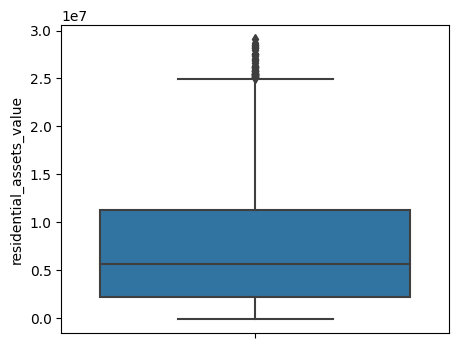

In [19]:
plt.figure(figsize = (5,4))
sns.boxplot(data, y= 'residential_assets_value')

<Axes: ylabel='commercial_assets_value'>

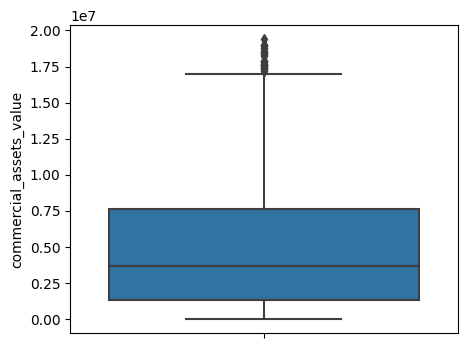

In [20]:
plt.figure(figsize = (5,4))
sns.boxplot(data, y= 'commercial_assets_value')

<Axes: ylabel='bank_asset_value'>

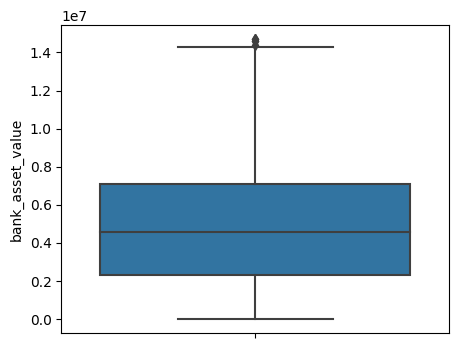

In [21]:
plt.figure(figsize = (5,4))
sns.boxplot(data, y= 'bank_asset_value')

In [22]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Filter data to remove outliers
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [23]:
data = remove_outliers(data,'residential_assets_value')
data = remove_outliers(data,'commercial_assets_value')
data = remove_outliers(data,'bank_asset_value')

In [24]:
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,self_employed,loan_status
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0,1.0,0.0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0,0.0,0.0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0,0.0,0.0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0,1.0,0.0
5,0,4800000,13500000,10,319,6800000,8300000,13700000,5100000,1.0,1.0,0.0


## Data Correlation

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4173 entries, 1 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4173 non-null   int64  
 1   income_annum              4173 non-null   int64  
 2   loan_amount               4173 non-null   int64  
 3   loan_term                 4173 non-null   int64  
 4   cibil_score               4173 non-null   int64  
 5   residential_assets_value  4173 non-null   int64  
 6   commercial_assets_value   4173 non-null   int64  
 7   luxury_assets_value       4173 non-null   int64  
 8   bank_asset_value          4173 non-null   int64  
 9   education_ Graduate       4173 non-null   float64
 10  self_employed             4173 non-null   float64
 11  loan_status               4173 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 423.8 KB


In [26]:
col = ['income_annum','residential_assets_value','bank_asset_value','commercial_assets_value','luxury_assets_value']

data['wealth'] = data['income_annum'] + data['residential_assets_value'] + data['commercial_assets_value'] + data['bank_asset_value'] + data['luxury_assets_value']

In [27]:
data = data.drop(labels = col,axis = 1)

In [28]:
data.corr()

,no_of_dependents,loan_amount,loan_term,cibil_score,education_ Graduate,self_employed,loan_status,wealth
no_of_dependents,1.000000,-0.005251,-0.020783,-0.010017,0.004032,0.001769,-0.018439,0.007280
loan_amount,-0.005251,1.000000,0.004848,-0.015739,0.016993,0.001464,0.017658,0.883382
loan_term,-0.020783,0.004848,1.000000,0.007863,-0.006570,0.008005,-0.114682,0.004296
cibil_score,-0.010017,-0.015739,0.007863,1.000000,-0.007885,-0.005226,0.770588,-0.021775
education_ Graduate,0.004032,0.016993,-0.006570,-0.007885,1.000000,-0.020919,0.004307,0.019522
self_employed,0.001769,0.001464,0.008005,-0.005226,-0.020919,1.000000,0.002815,0.001244
loan_status,-0.018439,0.017658,-0.114682,0.770588,0.004307,0.002815,1.000000,-0.009627
wealth,0.007280,0.883382,0.004296,-0.021775,0.019522,0.001244,-0.009627,1.000000


<Axes: >

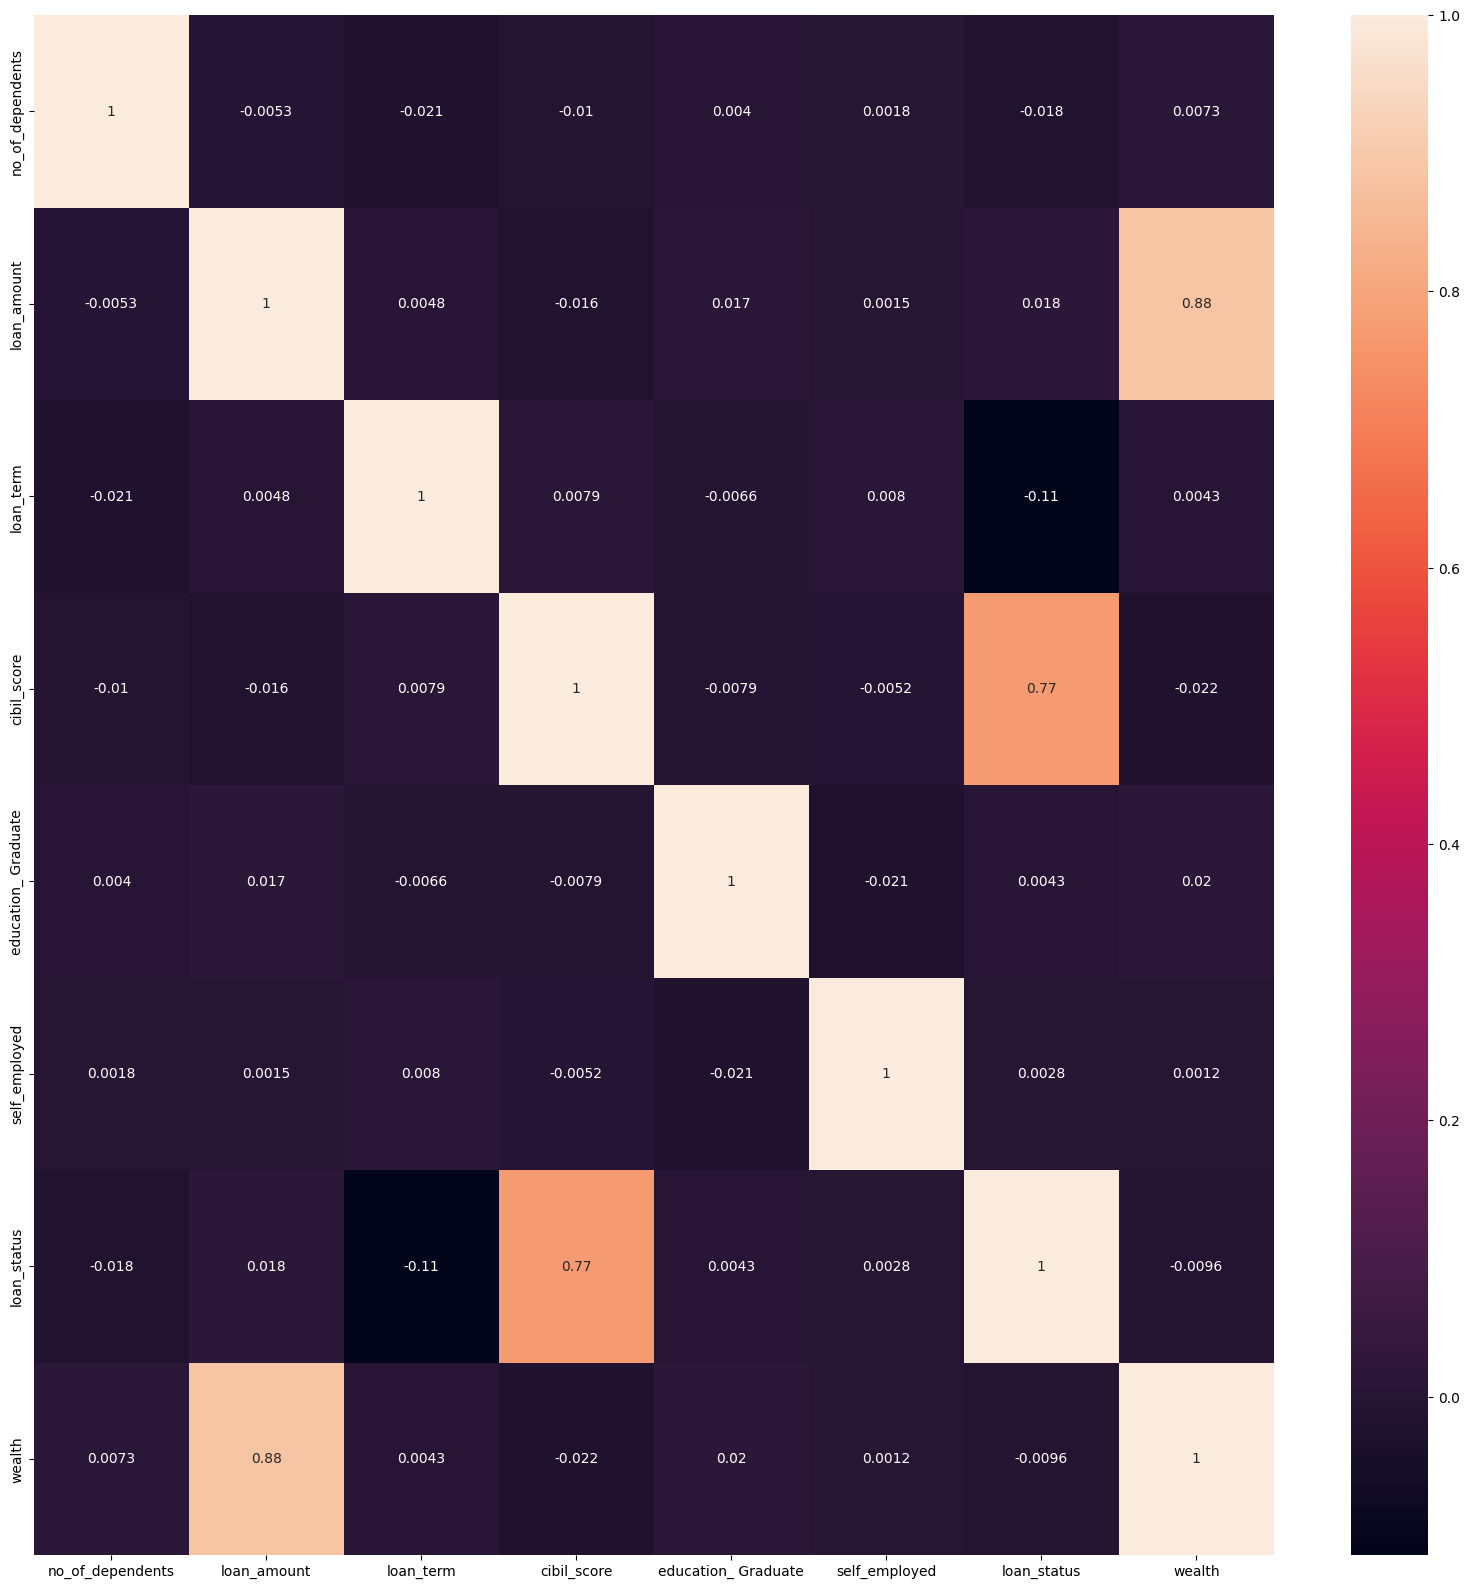

In [29]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot = True)

<Axes: xlabel='loan_status'>

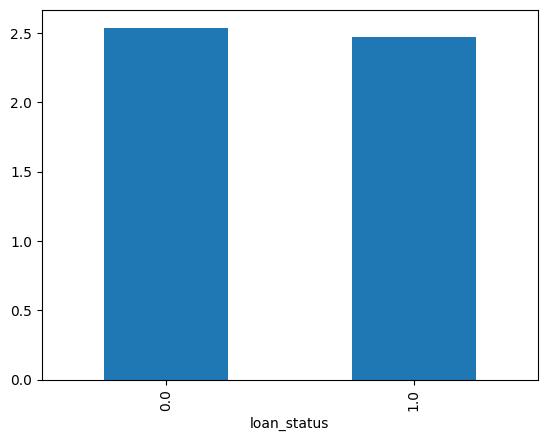

In [30]:
# relation b/w loan statues and dependents
data.groupby('loan_status')['no_of_dependents'].mean().plot(kind = 'bar')

<Axes: xlabel='loan_status'>

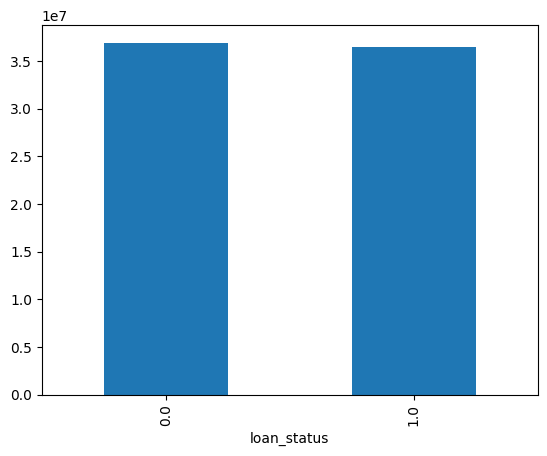

In [31]:
data.groupby('loan_status')['wealth'].mean().plot(kind = 'bar')

In [32]:
data['self_employed'].nunique()

2

<Axes: xlabel='self_employed', ylabel='count'>

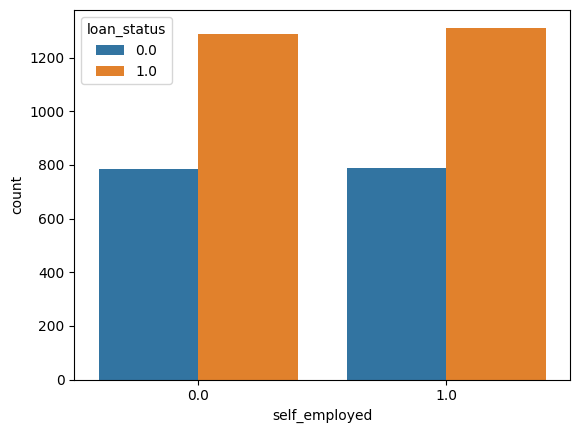

In [33]:
sns.countplot(x='self_employed', hue='loan_status', data=data)

<Axes: xlabel='education_ Graduate', ylabel='count'>

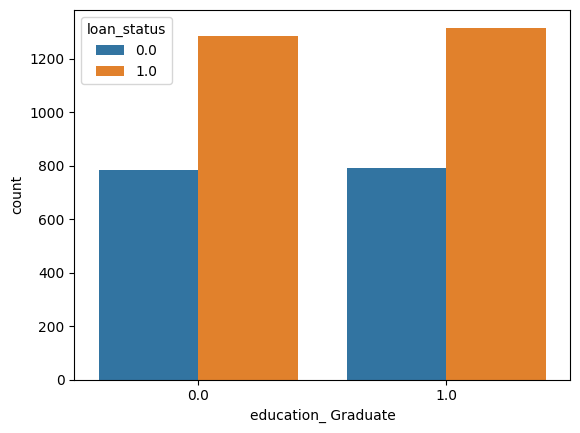

In [34]:
sns.countplot(x='education_ Graduate', hue='loan_status', data=data)

<Axes: xlabel='loan_term', ylabel='count'>

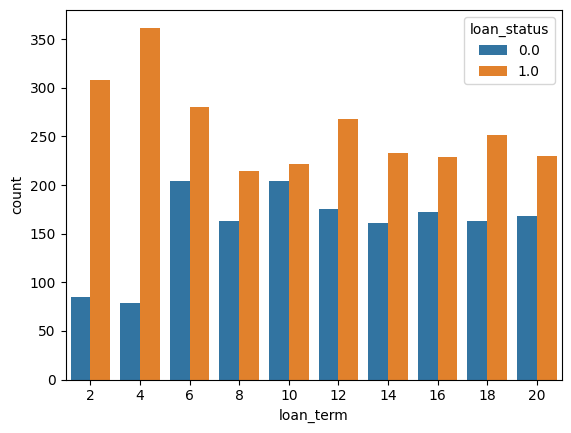

In [35]:
sns.countplot(x='loan_term', hue='loan_status', data=data)

# Split the Dataset

In [36]:
X = data.drop(labels = ['loan_status'],axis = 1)
Y = data['loan_status']

### Standard Scalar

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(X)

scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

X = scaled_df

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3338, 7)
(835, 7)
(3338,)
(835,)


# Model

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 91.86


### Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 97.37


### Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 97.13


### Support Vector Machine

In [43]:
from sklearn.svm import SVC

model = SVC(probability=True)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 95.57


### K Neighbors Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 92.81


### GaussianNB

In [45]:
from sklearn.naive_bayes import GaussianNB


model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 93.77
